<a href="https://colab.research.google.com/github/seolajo/DALC/blob/main/Naive_Bayes_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 나이브 베이즈 분류기의 확률 모델

* 나이브 베이즈는 조건부 확률 모델
* *N*개의 특성을 나타내는 벡터 **x**를 입력 받아 k개의 가능한 확률적 결과를 출력

\begin{equation}
p(C_k | x_1,...,x_n)
\end{equation}

* 위의 식에 베이즈 정리를 적용하면 다음과 같음

\begin{equation}
p(C_k | \textbf{x}) = \frac{p(C_k)p(\textbf{x}|C_k)}{p(\textbf{x})}
\end{equation}

* 위의 식에서 분자만이 출력 값에 영향을 받기 때문에 분모 부분을 상수로 취급할 수 있음

\begin{equation}
\begin{split}
p(C_k | \textbf{x}) & \propto p(C_k)p(\textbf{x}|C_k) \\
& \propto p(C_k, x_1, ..., x_n)
\end{split}
\end{equation}

* 위의 식을 연쇄 법칙을 사용해 다음과 같이 쓸 수 있음

\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & = p(C_k)p(x_1, ..., x_n | C_k) \\
& = p(C_k)p(x_1 | C_k)p(x_2, ..., x_n | C_k, x_1) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)p(x_3, ..., x_n | C_k, x_1, x_2) \\
& = p(C_k)p(x_1 | C_k)p(x_2 | C_k, x_1)...p(x_n | C_k, x_1, x_2, ..., x_{n-1})
\end{split}
\end{equation}

* 나이브 베이즈 분류기는 모든 특성이 독립이라고 가정하기 때문에 위의 식을 다음과 같이 쓸 수 있음

\begin{equation}
\begin{split}
p(C_k, x_1, ..., x_n) & \propto p(C_k)p(x_1|C_k)p(x_2|C_k)...p(x_n|C_k) \\
& \propto p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{split}
\end{equation}

* 위의 식을 통해 나온 값들 중 가장 큰 값을 갖는 클래스가 예측 결과

\begin{equation}
\hat{y} = \underset{k}{\arg\max} \; p(C_k) \prod_{i=1}^{n} p(x_i|C_k)
\end{equation}

# 나이브 베이스 분류기(Naive Bayes Classification)

* 베이즈 정리를 적용한 확률적 분류 알고리즘
* 모든 특성들이 독립임을 가정 (naive 가정)
* 입력 특성에 따라 3개의 분류기 존재
  * 가우시안 나이브 베이즈 분류기
  * 베르누이 나이브 베이즈 분류기
  * 다항 나이브 베이즈 분류기

In [1]:
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB, BernoulliNB,MultinomialNB #3가지 nb
from sklearn.datasets import fetch_covtype, fetch_20newsgroups # 실습할 데이터셋
from sklearn.model_selection import train_test_split #훈련용 테스트용 데이터 분할
from sklearn.preprocessing import StandardScaler #전처리
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer #텍스트 데이터 벡터화
from sklearn import metrics

In [2]:
# NB 확률 모델 구현 (발생확률을 안다고 가정)
prior = [0.45,0.3,0.15,0.1] #P(c)
likelihood = [[0.3,0.3,0.4],[0.7,0.2,0.1],[0.15,0.5,0.35],[0.6,0.2,0.2]]

# 특징 3개, 클래스 4개에 대해서 가능성 계산
idx = 0
for c,xs in zip(prior, likelihood) : #각각의 클래스의 가능성 구하기
    result = 1.
    
    for x in xs:
        result *= x
    result *= c
    
    idx += 1
    print(f"{idx}번째 클래스의 가능성 : {result}")

1번째 클래스의 가능성 : 0.0162
2번째 클래스의 가능성 : 0.0042
3번째 클래스의 가능성 : 0.0039375
4번째 클래스의 가능성 : 0.0024000000000000002


## 산림 토양 데이터
* 산림 지역 토양의 특징 데이터
* 토양이 어떤 종류에 속하는지 예측
* https://archive.ics.uci.edu/ml/datasets/Covertype 에서 데이터의 자세한 설명 확인 가능

In [3]:
#데이터 불러오기
covtype = fetch_covtype()
#print(covtype.DESCR)

In [ ]:
pd.DataFrame(covtype.data)

In [5]:
covtype.target

array([5, 5, 2, ..., 3, 3, 3], dtype=int32)

### 학습, 평가 데이터 분류

In [6]:
covtype_x = covtype.data
covtype_y = covtype.target

In [7]:
covtype_x_train, covtype_x_test, covtype_y_train, covtype_y_test = train_test_split(covtype_x,covtype_y, test_size = 0.2) #데이터 분할

In [8]:
print('전체 데이터 크기: {}'.format(covtype_x.shape))
print('전체 데이터 크기: {}'.format(covtype_x_train.shape))
print('전체 데이터 크기: {}'.format(covtype_x_test.shape))

전체 데이터 크기: (581012, 54)
전체 데이터 크기: (464809, 54)
전체 데이터 크기: (116203, 54)


### 전처리

#### 전처리 전 데이터

In [ ]:
covtype_df = pd.DataFrame(data=covtype_x)
covtype_df.describe()

In [ ]:
covtype_train_df = pd.DataFrame(data=covtype_x_train)
covtype_train_df.describe()

In [ ]:
covtype_test_df = pd.DataFrame(data=covtype_x_test)
covtype_test_df.describe()

#### 전처리 과정

In [12]:
scaler = StandardScaler()
covtype_x_train_scale = scaler.fit_transform(covtype_x_train)
covtype_x_test_scale = scaler.fit_transform(covtype_x_test)

#### 전처리 후 데이터
* 평균은 0에 가깝게, 표준평차는 1에 가깝게 정규화

In [ ]:
covtype_train_df = pd.DataFrame(data=covtype_x_train_scale)
covtype_train_df.describe() 

In [ ]:
covtype_test_df = pd.DataFrame(data=covtype_x_test_scale)
covtype_test_df.describe() 

## 20 Newsgroup 데이터
* 뉴스 기사가 어느 그룹에 속하는지 분류
* 뉴스 기사는 텍스트 데이터이기 때문에 특별한 전처리 과정이 필요

In [ ]:
newsgroup = fetch_20newsgroups()
print(newsgroup.DESCR)

In [ ]:
newsgroup.data

In [ ]:
newsgroup.target_names

### 학습, 평가 데이터 분류

In [18]:
newsgroup_train = fetch_20newsgroups(subset='train')
newsgroup_test = fetch_20newsgroups(subset='test')

In [19]:
x_train,y_train = newsgroup_train.data, newsgroup_train.target
x_test,y_test = newsgroup_test.data, newsgroup_test.target

### 벡터화
* 텍스트 데이터는 기계학습 모델에 입력 할 수 없음
* 벡터화는 텍스트 데이터를 실수 벡터로 변환해 기계학습 모델에 입력 할 수 있도록 하는 전처리 과정
* Scikit-learn에서는 Count, Tf-idf, Hashing 세가지 방법을 지원

#### CountVectorizer
* 문서에 나온 단어의 수를 세서 벡터 생성

In [20]:
count_vectorizer = CountVectorizer()

In [21]:
x_train_count = count_vectorizer.fit_transform(x_train)
x_test_count = count_vectorizer.fit_transform(x_test)

데이터를 희소 행렬 형태로 표현

In [22]:
x_train_count

<11314x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [ ]:
for v in x_train_count[0]:
    print(v)

#### HashingVectorizer
* 각 단어를 해쉬 값으로 표현
* 미리 정해진 크기의 벡터로 표현

In [24]:
hash_vectorizer = HashingVectorizer(n_features = 1000)

In [25]:
x_train_hash = hash_vectorizer.fit_transform(x_train)
x_test_hash = hash_vectorizer.fit_transform(x_test)

In [26]:
x_train_hash

<11314x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 1550687 stored elements in Compressed Sparse Row format>

In [ ]:
print(x_train_hash[0])

#### TfidfVectorizer
* 문서에 나온 단어 빈도(term frequency)와 역문서 빈도(inverse document frequency)를 곱해서 구함
* 각 빈도는 일반적으로 로그 스케일링 후 사용
* $tf(t, d) = log(f(t, d) + 1)$
* $idf(t, D) = \frac{|D|}{|d \in D : t \in d| + 1}$
* $tfidf(t, d, D) = tf(t, d) \times idf(t, D)$

In [28]:
tfidf_vectorizer = TfidfVectorizer()

In [29]:
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.fit_transform(x_test)

In [30]:
x_train_tfidf

<11314x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 1787565 stored elements in Compressed Sparse Row format>

In [ ]:
for v in x_train_tfidf[0]:
    print(v)

## 가우시안 나이브 베이즈

* 입력 특성이 가우시안(정규) 분포를 갖는다고 가정

In [32]:
model = GaussianNB()
model.fit(covtype_x_train_scale,covtype_y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
#train 데이터 사용
predict = model.predict(covtype_x_train_scale) #모델로 예측 값 구해보기
acc = metrics.accuracy_score(covtype_y_train,predict) #정확도
f1 = metrics.f1_score(covtype_y_train,predict,average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 score: {}'.format(f1))

Train Accuracy: 0.08782962464151942
Train F1 score: [0.03988881 0.01802234 0.33454187 0.13845523 0.0433419  0.06815402
 0.23724639]


In [34]:
#test 데이터 사용
predict = model.predict(covtype_x_test_scale) #모델로 예측 값 구해보기
acc = metrics.accuracy_score(covtype_y_test,predict) #정확도
f1 = metrics.f1_score(covtype_y_test,predict,average=None)

print('Test Accuracy: {}'.format(acc))
print('Test F1 score: {}'.format(f1))

Test Accuracy: 0.49091675774291543
Test F1 score: [0.00825406 0.6597058  0.         0.         0.         0.14417582
 0.02700096]


In [35]:
#시각화
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [36]:
def make_meshgrid(x,y,h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx,yy

In [37]:
def plot_contours(clf, xx, yy,**params):
    z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    out = plt.contourf(xx, yy, z, **params)
    
    return out

In [38]:
#모든 데이터를 쓰기엔 많으니 1000개 정도만
x,y = make_blobs(n_samples=1000)

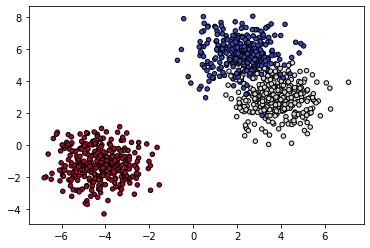

In [39]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm, s=20, edgecolors ='k')

In [40]:
model = GaussianNB()
model.fit(x,y)

GaussianNB(priors=None, var_smoothing=1e-09)

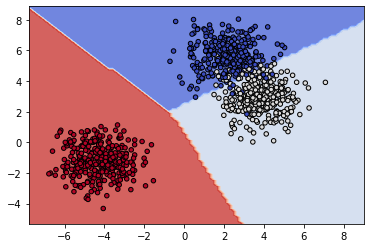

In [41]:
xx,yy = make_meshgrid(x[:,],x[:,1])
plot_contours(model,xx,yy,cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm, s=20, edgecolors ='k')

## 베르누이 나이브 베이즈

* 입력 특성이 베르누이 분포에 의해 생성된 이진 값을 갖는 다고 가정

### 학습 및 평가 (Count)

In [42]:
model = BernoulliNB()
model.fit(x_train_count,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [43]:
#train 데이터 사용
predict = model.predict(x_train_count) #모델로 예측 값 구해보기
acc = metrics.accuracy_score(y_train,predict) #정확도
f1 = metrics.f1_score(y_train,predict,average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 score: {}'.format(f1))

Train Accuracy: 0.7821283365741559
Train F1 score: [0.80096502 0.8538398  0.13858268 0.70686337 0.85220126 0.87944493
 0.51627694 0.84532672 0.89064976 0.87179487 0.94561404 0.91331546
 0.84627832 0.89825848 0.9047619  0.79242424 0.84693878 0.84489796
 0.67329545 0.14742015]


In [44]:
count_vectorizer = CountVectorizer()

In [47]:
x_train,y_train = newsgroup_train.data, newsgroup_train.target
x_test,y_test = newsgroup_test.data, newsgroup_test.target

In [48]:
x_train_count = count_vectorizer.fit_transform(x_train)
x_test_count = count_vectorizer.fit_transform(x_test)

In [ ]:
#test 데이터 사용해서 정확도와 f1 구하세요!
predict = model.predict(x_test_count) #모델로 예측 값 구해보기
acc = metrics.accuracy_score(y_test,predict) #정확도
f1 = metrics.f1_score(y_test,predict,average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 score: {}'.format(f1))

### 학습 및 평가 (Hash)

In [ ]:
model = BernoulliNB()
model.fit(x_train_hash,y_train)

In [ ]:
#train 데이터 사용
predict = model.predict(x_train_hash) #모델로 예측 값 구해보기
acc = metrics.accuracy_score(y_train,predict) #정확도
f1 = metrics.f1_score(y_train,predict,average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 score: {}'.format(f1))

In [ ]:
hash_vectorizer = HashingVectorizer(n_features = 1000)

In [ ]:
x_train_hash = hash_vectorizer.fit_transform(x_train)
x_test_hash = hash_vectorizer.fit_transform(x_test)

In [ ]:
#test 데이터 사용
predict = model.predict(x_test_hash) #모델로 예측 값 구해보기
acc = metrics.accuracy_score(y_test,predict) #정확도
f1 = metrics.f1_score(y_test,predict,average=None)

print('Test Accuracy: {}'.format(acc))
print('Test F1 score: {}'.format(f1))

### 학습 및 평가 (Tf-idf)

In [ ]:
model = BernoulliNB()
model.fit(x_train_tfidf,y_train)

In [ ]:
#train 데이터 사용
predict = model.predict(x_train_tfidf)
acc = metrics.accuracy_score(y_train,predict)
f1 = metrics.f1_score(y_train,predict,average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 score: {}'.format(f1))

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.fit_transform(x_test)

In [ ]:
#test 데이터 사용해서 정확도와 f1 구하세요!
predict = model.predict(x_test_tfidf)
acc = metrics.accuracy_score(y_test,predict)
f1 = metrics.f1_score(y_test,predict,average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 score: {}'.format(f1))

### 시각화

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
def make_meshgrid(x,y,h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx,yy

In [ ]:
def plot_contours(clf, xx, yy,**params):
    z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    out = plt.contourf(xx, yy, z, **params)
    
    return out

In [ ]:
x,y = make_blobs(n_samples=1000)

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm, s=20, edgecolors ='k')

In [ ]:
model =BernoulliNB()
model.fit(x,y)

In [ ]:
xx,yy = make_meshgrid(x[:,],x[:,1])
plot_contours(model,xx,yy,cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm, s=20, edgecolors ='k')

## 다항 나이브 베이즈

* 입력 특성이 다항분포에 의해 생성된 빈도수 값을 갖는 다고 가정

### 학습 및 평가 (Count)

In [ ]:
model = MultinomialNB()
model.fit(x_train_count,y_train)

In [ ]:
#train 데이터 사용해서 정확도와 f1 구하세요!
predict = model.predict(x_train_count)
acc = metrics.accuracy_score(y_train,predict) 
f1 = metrics.f1_score(y_train,predict,average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 score: {}'.format(f1))

In [ ]:
#test 데이터 사용해서 정확도와 f1 구하세요!
predict = model.predict(covtype_x_test_scale)
acc = metrics.accuracy_score(covtype_y_test,predict)
f1 = metrics.f1_score(covtype_y_test,predict,average=None)

print('Test Accuracy: {}'.format(acc))
print('Test F1 score: {}'.format(f1))

### 학습 및 평가 (Tf-idf)

In [ ]:
model = MultinomialNB()
model.fit(x_train_tfidf,y_train)

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.fit_transform(x_test)

In [ ]:
#train 데이터 사용해서 정확도와 f1 구하세요!
predict = model.predict(x_train_tfidf)
acc = metrics.accuracy_score(y_train,predict)
f1 = metrics.f1_score(y_train,predict,average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 score: {}'.format(f1))

In [ ]:
#test 데이터 사용해서 정확도와 f1 구하세요!
predict = model.predict(x_test_tfidf)
acc = metrics.accuracy_score(y_test,predict)
f1 = metrics.f1_score(y_test,predict,average=None)

print('Train Accuracy: {}'.format(acc))
print('Train F1 score: {}'.format(f1))

### 시각화

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
def make_meshgrid(x,y,h=0.2):
    x_min, x_max = x.min()-1, x.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    return xx,yy

In [ ]:
def plot_contours(clf, xx, yy,**params):
    z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    out = plt.contourf(xx, yy, z, **params)
    
    return out

In [ ]:
x,y = make_blobs(n_samples=1000)

In [ ]:
# x,y값 시각화 해보세요!
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm, s=20, edgecolors ='k')

In [ ]:
model =MultinomialNB()
model.fit(x,y)

In [ ]:
#다항 나이브 베이즈 모델을 시각화 해보세요!
xx,yy = make_meshgrid(x[:,],x[:,1])
plot_contours(model,xx,yy,cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.coolwarm, s=20, edgecolors ='k')